# Punto 1

Carga de Librerias

In [ ]:
import numpy as np

Creación de la matriz

In [ ]:
# Generate a random mxn matrix with values between 0 and 1
A = np.random.rand(3, 3)
print("Matrix A:")
# Print the results
print(A)

Matrix A:
[[0.40505467 0.95694089 0.61509527]
 [0.9610183  0.7746035  0.10138521]
 [0.522763   0.49766088 0.69684703]]


Calculos requeridos

In [ ]:
# Rank of A
rank_A = np.linalg.matrix_rank(A)
# Print the results
print("\nRank of A:", rank_A)


Rank of A: 3


In [ ]:
# Trace of A
trace_A = np.trace(A)
# Print the results
print("Trace of A:", trace_A)

Trace of A: 1.8765051909689512


In [ ]:
# Determinant of A
det_A = np.linalg.det(A)
# Print the results
print("Determinant of A:", det_A)

Determinant of A: -0.34682207584956176


In [ ]:
# Invert A if possible
try:
    A_inv = np.linalg.inv(A)
except np.linalg.LinAlgError:
    A_inv = None

# Print the results
if A_inv is not None:
    print("Inverse of A:")
    print(A_inv)
else:
    print("A is not invertible because it's not a square matrix or doesn't have full rank.")

Inverse of A:
[[-1.41088104  1.04010841  1.09403444]
 [ 1.77809417  0.11327973 -1.58597535]
 [-0.21142589 -0.86117191  1.74695035]]


In [ ]:
# Calculate A'A
AtA = np.dot(A.T, A)  # A transpose times A
print(AtA)

[[1.36090662 1.39218021 0.7108661 ]
 [1.39218021 1.7634128  1.01393666]
 [0.7108661  1.01393666 0.87421693]]


In [ ]:
# Calculate AA'
AAt = np.dot(A, A.T)  # A times A transpose
print(AAt)

[[1.45814734 1.19287627 1.11660695]
 [1.19287627 1.53384572 0.95852465]
 [1.11660695 0.95852465 1.00654329]]


In [ ]:
# Calculate the eigenvalues and eigenvectors of A'A
eigenvalues_AtA, eigenvectors_AtA = np.linalg.eig(AtA)
# Print the results
print("Eigenvalues and eigenvectors of A'A:")
print("Eigenvalues:")
print(eigenvalues_AtA)
print("Eigenvectors:")
print(eigenvectors_AtA)

Eigenvalues and eigenvectors of A'A:
Eigenvalues:
[3.53921963 0.36661273 0.09270399]
Eigenvectors:
[[-0.58205542 -0.60592036  0.54228406]
 [-0.69620115  0.02677187 -0.71734735]
 [-0.42013741  0.7950747   0.43742516]]


In [ ]:
# Calculate the eigenvalues and eigenvectors of AA'
eigenvalues_AAt, eigenvectors_AAt = np.linalg.eig(AAt)
print("\nEigenvalues and eigenvectors of AA':")
print("Eigenvalues:")
print(eigenvalues_AAt)
print("Eigenvectors:")
print(eigenvectors_AAt)


Eigenvalues and eigenvectors of AA':
Eigenvalues:
[3.53921963 0.09270399 0.36661273]
Eigenvectors:
[[-0.61682009 -0.64946969  0.44465954]
 [-0.60662987  0.03229702 -0.79432808]
 [-0.50153084  0.75970128  0.41390916]]


# Punto 2

Carga librerias

In [ ]:
import cv2
import requests
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt

Carga y Editar Rostro

In [ ]:
# URL de la imagen en escala de grises
image_url = 'https://github.com/marioeoteroa/EspecializacionADS-ML2/raw/main/Fotos_Procesadas/Foto_procesada.jpg'

# Descargar la imagen desde la URL
response = requests.get(image_url)
if response.status_code == 200:
    # Leer la imagen desde la respuesta en bytes
    image_bytes = BytesIO(response.content)

    # Convertir los bytes en una matriz NumPy y cargar la imagen en escala de grises
    your_face_gray = cv2.imdecode(np.frombuffer(image_bytes.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

In [ ]:
# Guardar la imagen procesada en un archivo
#cv2.imwrite('Foto_procesada.jpg', your_face)

True

Grafica Rostro Editado

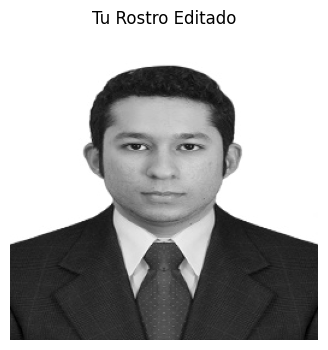

In [ ]:
# 2. Graficar tu rostro editado
plt.figure(figsize=(4, 4))
plt.imshow(your_face_gray, cmap='gray')
plt.title('Tu Rostro Editado')
plt.axis('off')
plt.show()

Calculo Promedio y Grafica Rostro Grupo


In [ ]:
import cv2
import requests
import numpy as np
import os
from io import BytesIO

In [ ]:
# URL del directorio en GitHub
github_directory_url = "https://api.github.com/repos/marioeoteroa/EspecializacionADS-ML2/contents/Fotos_Procesadas"

# Realizar una solicitud GET a la API de GitHub para obtener la lista de archivos en el directorio
response = requests.get(github_directory_url)

if response.status_code == 200:
    # Obtener la respuesta JSON
    data = response.json()

    # Inicializar una lista para almacenar las imágenes
    images = []

    # Iterar a través de los archivos en el directorio
    for item in data:
        # Obtener el nombre del archivo y la URL de descarga
        file_name = item["name"]
        download_url = item["download_url"]

        # Descargar la imagen desde la URL
        image_response = requests.get(download_url)

        if image_response.status_code == 200:
            # Leer la imagen desde la respuesta y convertirla en una matriz NumPy
            image_bytes = BytesIO(image_response.content)
            img = cv2.imdecode(np.frombuffer(image_bytes.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

            # Asegurarse de que la imagen tiene las dimensiones correctas (256x256)
            img = cv2.resize(img, (256, 256))

            images.append(img)
        else:
            print(f"No se pudo descargar la imagen {file_name}. Código de estado: {image_response.status_code}")

    # Convertir la lista de imágenes en una matriz NumPy
    image_array = np.array(images)
else:
    print(f"No se pudo acceder al directorio. Código de estado: {response.status_code}")


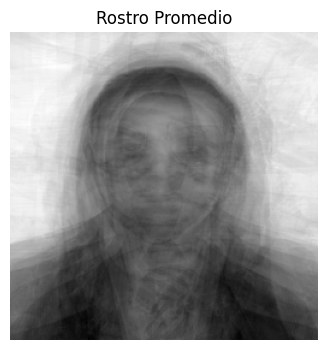

In [ ]:
# Calcular la imagen promedio del grupo
average_face = np.mean(image_array, axis=0).astype(np.uint8)

# 2. Graficar tu rostro editado
plt.figure(figsize=(4, 4))
plt.imshow(average_face, cmap='gray')
plt.title('Rostro Promedio')
plt.axis('off')
plt.show()

# Guardar la imagen promedio
#cv2.imwrite("imagen_promedio.jpg", average_face)

Distancia del Rostro

In [ ]:
# 5. Calcular la distancia entre tu rostro y el promedio (por ejemplo, la diferencia absoluta media)
distance = np.mean(np.abs(your_face_gray - average_face))

print(f"La distancia entre tu rostro y el promedio del grupo es: {distance}")

La distancia entre tu rostro y el promedio del grupo es: 108.56710815429688


# Punto 3

# Punto 4

Carga de librerias

In [ ]:
import cv2
import requests
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt

Carga del Rostro

In [ ]:
# URL de la imagen en escala de grises
image_url = 'https://github.com/marioeoteroa/EspecializacionADS-ML2/raw/main/Fotos_Procesadas/Foto_procesada.jpg'

# Descargar la imagen desde la URL
response = requests.get(image_url)
if response.status_code == 200:
    # Leer la imagen desde la respuesta en bytes
    image_bytes = BytesIO(response.content)

    # Convertir los bytes en una matriz NumPy y cargar la imagen en escala de grises
    your_face_gray = cv2.imdecode(np.frombuffer(image_bytes.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

SDV

In [ ]:
image = your_face_gray

# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(image, full_matrices=False)

# Define the number of singular values to use for approximation
num_singular_values_to_use = np.arange(1, 35, step=5)
#num_singular_values_to_use = np.arange(1, min(image.shape), step=5)

Graficar Rostro

Using 1 Singular Values, MSE: 2833.77
Using 6 Singular Values, MSE: 396.81
Using 11 Singular Values, MSE: 202.32
Using 16 Singular Values, MSE: 126.38
Using 21 Singular Values, MSE: 90.25
Using 26 Singular Values, MSE: 68.94
Using 31 Singular Values, MSE: 54.26


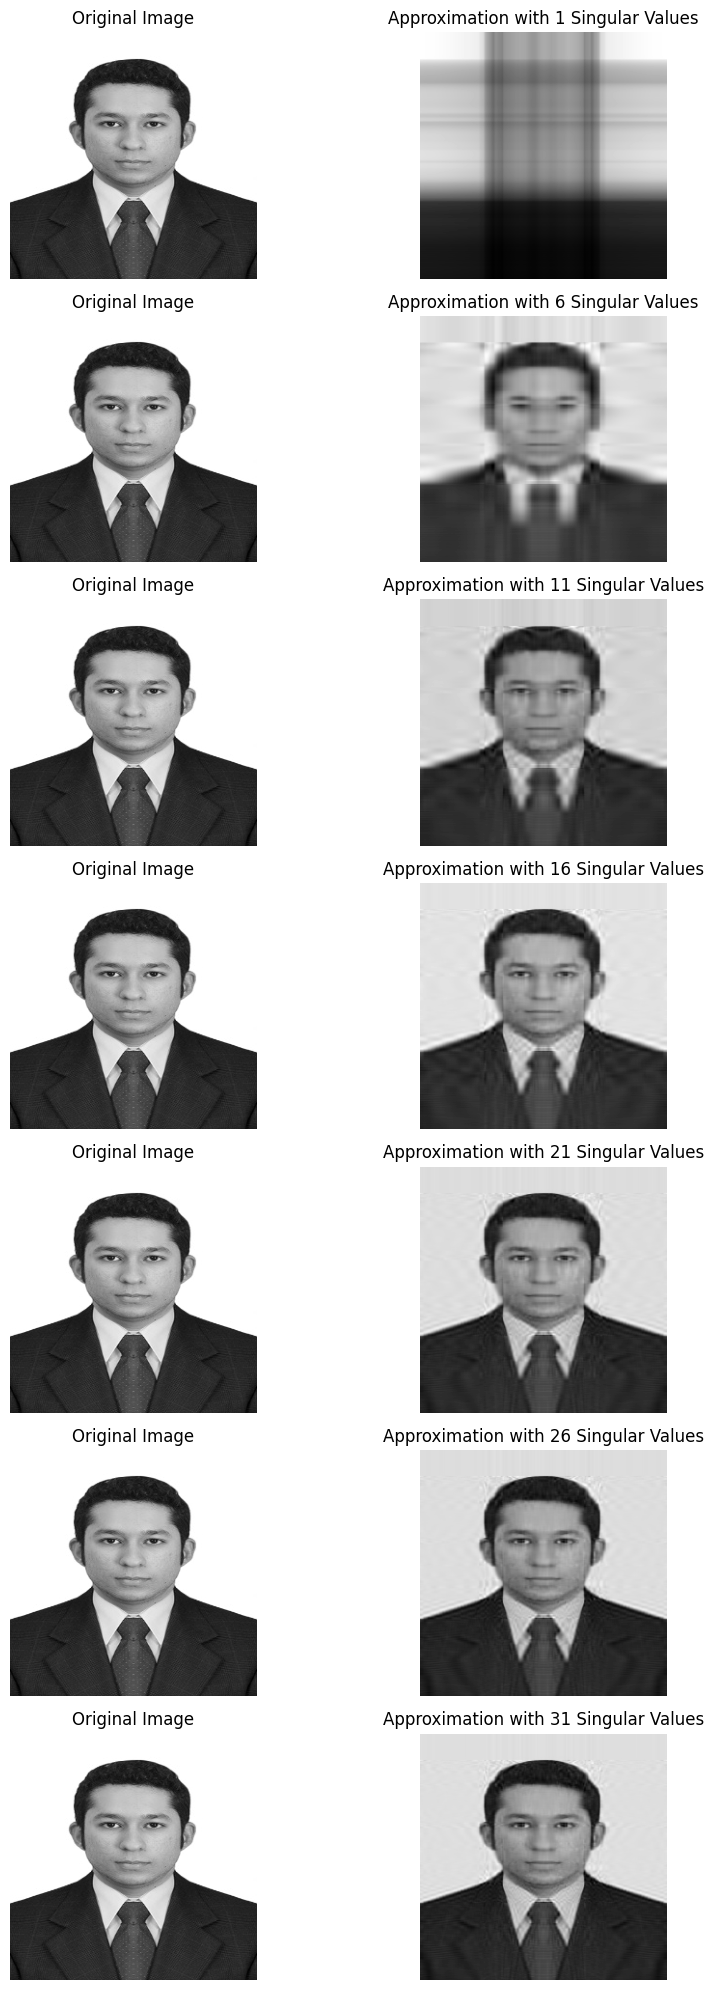

In [ ]:
# Create a subplot to display original and approximated images
fig, axes = plt.subplots(len(num_singular_values_to_use), 2, figsize=(10, 20))

for i, num_sv in enumerate(num_singular_values_to_use):
    # Reconstruct the image using a subset of singular values and vectors
    approx_image = np.dot(U[:, :num_sv], np.dot(np.diag(S[:num_sv]), VT[:num_sv, :]))

    # Display the original image
    axes[i, 0].imshow(image, cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')

    # Display the approximated image
    axes[i, 1].imshow(approx_image, cmap='gray')
    axes[i, 1].set_title(f'Approximation with {num_sv} Singular Values')
    axes[i, 1].axis('off')

    # Calculate and print the mean squared error (MSE) as a measure of difference
    mse = np.mean((image - approx_image) ** 2)
    print(f'Using {num_sv} Singular Values, MSE: {mse:.2f}')

plt.tight_layout()
plt.show()

# Punto 5

Carga de librerias

In [ ]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Carga de información

In [ ]:
mnist = load_digits(return_X_y=False)
#mnist

Definicion de variables

In [ ]:
X = pd.DataFrame(mnist.data)
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
y = pd.DataFrame(mnist.target)
y.head(5)

,0
0,0
1,1
2,2
3,3
4,4


Filtrado de variables

In [ ]:
y_sub = y[y[0].isin([0,8])]
y_sub.head(5)

,0
0,0
8,8
10,0
18,8
20,0


In [ ]:
X_sub = X.iloc[y_sub.index]
X_sub.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
10,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0
18,0.0,0.0,10.0,7.0,13.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,14.0,5.0,0.0,0.0,0.0
20,0.0,0.0,3.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,12.0,13.0,4.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.99, random_state=42)

In [ ]:
y_train.squeeze().shape

(3,)

In [ ]:
X_train.shape

(3, 64)

Modelo

In [ ]:
model = LogisticRegression()
model

In [ ]:
model.fit(X_train, y_train.squeeze())

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.994269340974212

# Punto 6

# Punto 7

Carga de Librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

Carga de Informacion

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Filter the dataset to only include 0s and 8s
X = X[(y == 0) | (y == 8)]
y = y[(y == 0) | (y == 8)]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Naive logistic regression model

In [ ]:
# Train a naive logistic regression model on the raw MNIST images
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = logistic_model.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model on raw images: {accuracy_raw:.2f}")

Accuracy of the model on raw images: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Dimensionality reduction techniques

In [ ]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Perform SVD for dimensionality reduction
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train)

# Fit t-SNE on the combined training and test data
tsne = TSNE(n_components=2, random_state=42)
X_tsne_combined = tsne.fit_transform(np.vstack((X_train, X_test)))

# Separate the transformed data back into training and test sets
X_tsne_train = X_tsne_combined[:len(X_train)]
X_tsne_test = X_tsne_combined[len(X_train):]

Plot features

Text(0.5, 1.0, 't-SNE')

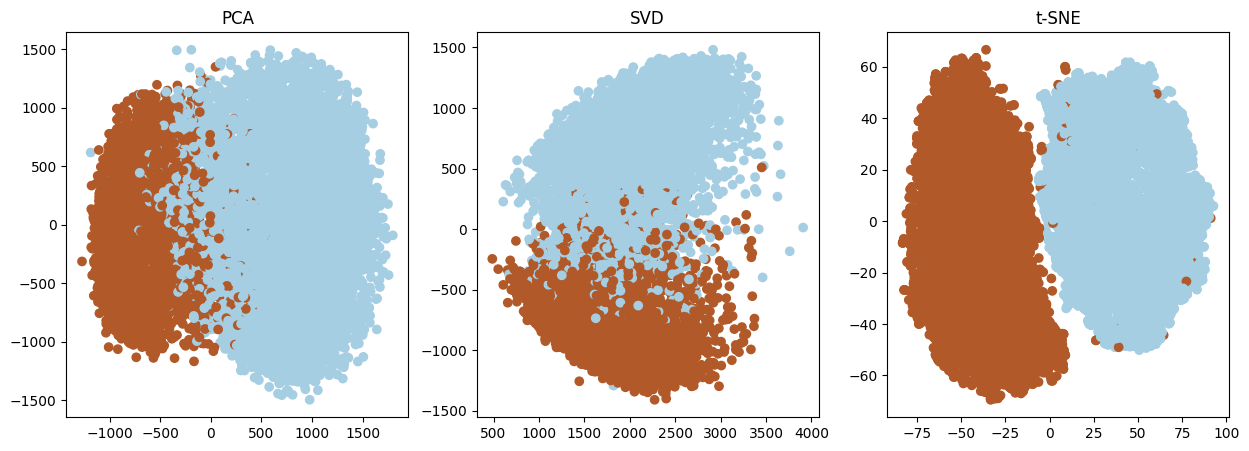

In [ ]:
# Plot the 2 new features generated by each algorithm
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title("PCA")

plt.subplot(132)
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title("SVD")

plt.subplot(133)
plt.scatter(X_tsne_train[:, 0], X_tsne_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title("t-SNE")

#plt.show()

Evaluate the performance

In [ ]:
# Train logistic regression models on reduced feature sets
logistic_model_pca = LogisticRegression(random_state=42)
logistic_model_pca.fit(X_pca, y_train)

logistic_model_svd = LogisticRegression(random_state=42)
logistic_model_svd.fit(X_svd, y_train)

logistic_model_tsne = LogisticRegression(random_state=42)
logistic_model_tsne.fit(X_tsne_train, y_train)

# Evaluate the models on the test set
y_pred_pca = logistic_model_pca.predict(pca.transform(X_test))
y_pred_svd = logistic_model_svd.predict(svd.transform(X_test))
y_pred_tsne = logistic_model_tsne.predict(X_tsne_test)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
accuracy_svd = accuracy_score(y_test, y_pred_svd)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)

print(f"Accuracy with PCA: {accuracy_pca:.2f}")
print(f"Accuracy with SVD: {accuracy_svd:.2f}")
print(f"Accuracy with t-SNE: {accuracy_tsne:.2f}")


Accuracy with PCA: 0.95
Accuracy with SVD: 0.96
Accuracy with t-SNE: 1.00


# Punto 8

To make Principal Component Analysis (PCA) more robust, you can consider the following strategies:

Standardization: Standardize your data by subtracting the mean and scaling to unit variance. This helps PCA perform better when features are on different scales.

Outlier Detection and Handling: Identify and handle outliers in your data. You can use techniques like the IQR (Interquartile Range) method or robust statistical estimators to mitigate the impact of outliers.

Example Scenario:
Suppose you have a dataset containing the heights (in centimeters) and weights (in kilograms) of individuals. You want to use PCA to analyze the data and explore potential patterns.

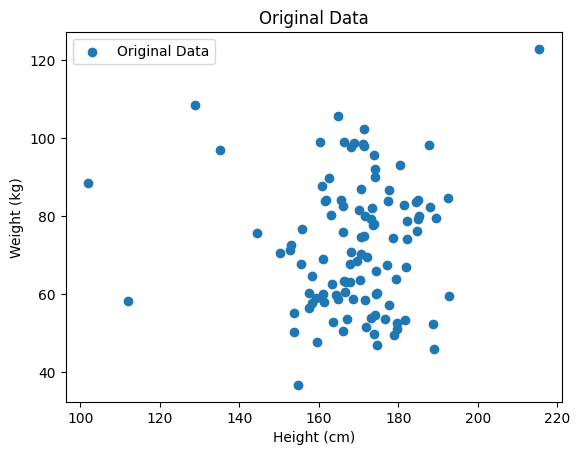

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope

# Generate synthetic data with outliers
np.random.seed(0)
n_samples = 100
heights = np.random.normal(170, 10, n_samples)
weights = np.random.normal(70, 15, n_samples)
outliers_heights = np.random.uniform(100, 220, 5)
outliers_weights = np.random.uniform(30, 130, 5)
heights = np.concatenate((heights, outliers_heights))
weights = np.concatenate((weights, outliers_weights))

# Create a DataFrame
data = pd.DataFrame({'Height': heights, 'Weight': weights})

# Visualization of the original data
plt.scatter(data['Height'], data['Weight'], label='Original Data')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Original Data')
plt.legend()
plt.show()


In this example, we have a dataset containing heights and weights of individuals. Some outliers are present in the data.

Now, let's perform PCA with and without standardization/normalization and outlier detection/handling, and compare the results in terms of variance explained and outlier sensitivity:

In [ ]:
# Standardization/Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA without standardization/normalization
pca_raw = PCA()
pca_raw.fit(data)

# PCA with standardization/normalization
pca_scaled = PCA()
pca_scaled.fit(scaled_data)

# Outlier Detection and Handling
outlier_detector = EllipticEnvelope(contamination=0.05)  # Assuming 5% of the data are outliers
outlier_detector.fit(scaled_data)

# Remove outliers
outliers_removed = scaled_data[outlier_detector.predict(scaled_data) == 1]

# PCA with standardization/normalization and outlier handling
pca_outliers_removed = PCA()
pca_outliers_removed.fit(outliers_removed)

# Variance Explained
explained_variance_raw = np.sum(pca_raw.explained_variance_ratio_)
explained_variance_scaled = np.sum(pca_scaled.explained_variance_ratio_)
explained_variance_outliers_removed = np.sum(pca_outliers_removed.explained_variance_ratio_)

print(f"Explained Variance (Raw Data): {explained_variance_raw:.2f}")
print(f"Explained Variance (Scaled Data): {explained_variance_scaled:.2f}")
print(f"Explained Variance (Scaled Data with Outliers Removed): {explained_variance_outliers_removed:.2f}")

# Outlier Sensitivity
outlier_sensitivity_raw = len(outliers_removed) / len(data)
outlier_sensitivity_scaled = len(outliers_removed) / len(scaled_data)

print(f"Outlier Sensitivity (Raw Data): {outlier_sensitivity_raw:.2%}")
print(f"Outlier Sensitivity (Scaled Data): {outlier_sensitivity_scaled:.2%}")


Explained Variance (Raw Data): 1.00000000
Explained Variance (Scaled Data): 1.00000000
Explained Variance (Scaled Data with Outliers Removed): 1.00000000
Outlier Sensitivity (Raw Data): 94.28571429%
Outlier Sensitivity (Scaled Data): 94.28571429%


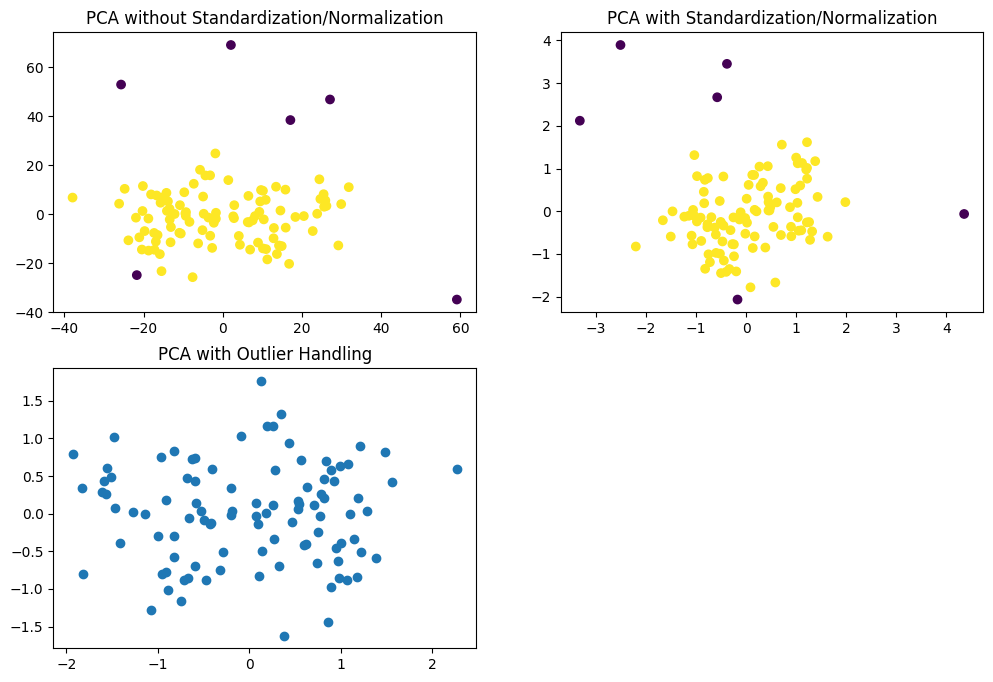

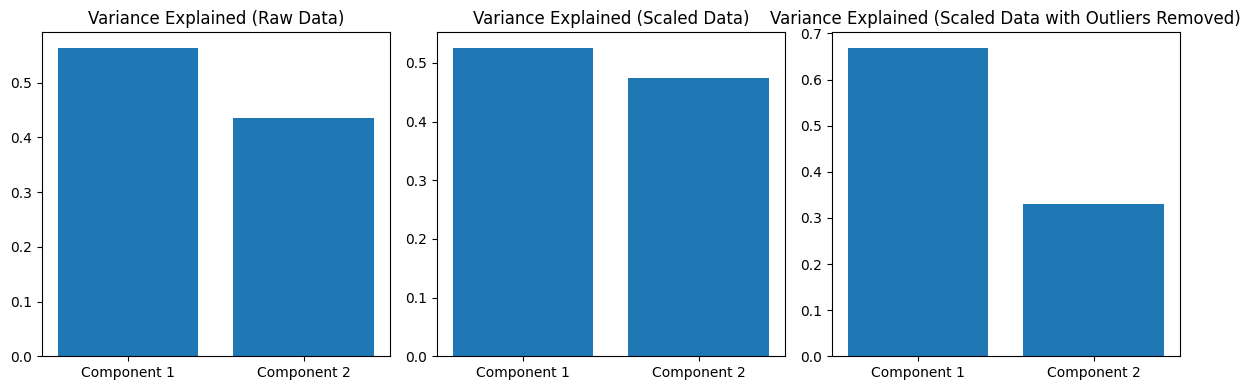

In [ ]:
# Scatter Plots de Componentes Principales
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(pca_raw_result[:, 0], pca_raw_result[:, 1], c=outlier_detector.predict(scaled_data))
plt.title('PCA without Standardization/Normalization')

plt.subplot(2, 2, 2)
plt.scatter(pca_scaled_result[:, 0], pca_scaled_result[:, 1], c=outlier_detector.predict(scaled_data))
plt.title('PCA with Standardization/Normalization')

plt.subplot(2, 2, 3)
plt.scatter(pca_outliers_removed_result[:, 0], pca_outliers_removed_result[:, 1])
plt.title('PCA with Outlier Handling')

# Gráficos de Varianza Explicada
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.bar(range(1, 3), pca_raw.explained_variance_ratio_)
plt.xticks([1, 2], ['Component 1', 'Component 2'])
plt.title('Variance Explained (Raw Data)')

plt.subplot(1, 3, 2)
plt.bar(range(1, 3), pca_scaled.explained_variance_ratio_)
plt.xticks([1, 2], ['Component 1', 'Component 2'])
plt.title('Variance Explained (Scaled Data)')

plt.subplot(1, 3, 3)
plt.bar(range(1, 3), pca_outliers_removed.explained_variance_ratio_)
plt.xticks([1, 2], ['Component 1', 'Component 2'])
plt.title('Variance Explained (Scaled Data with Outliers Removed)')

plt.tight_layout()
plt.show()


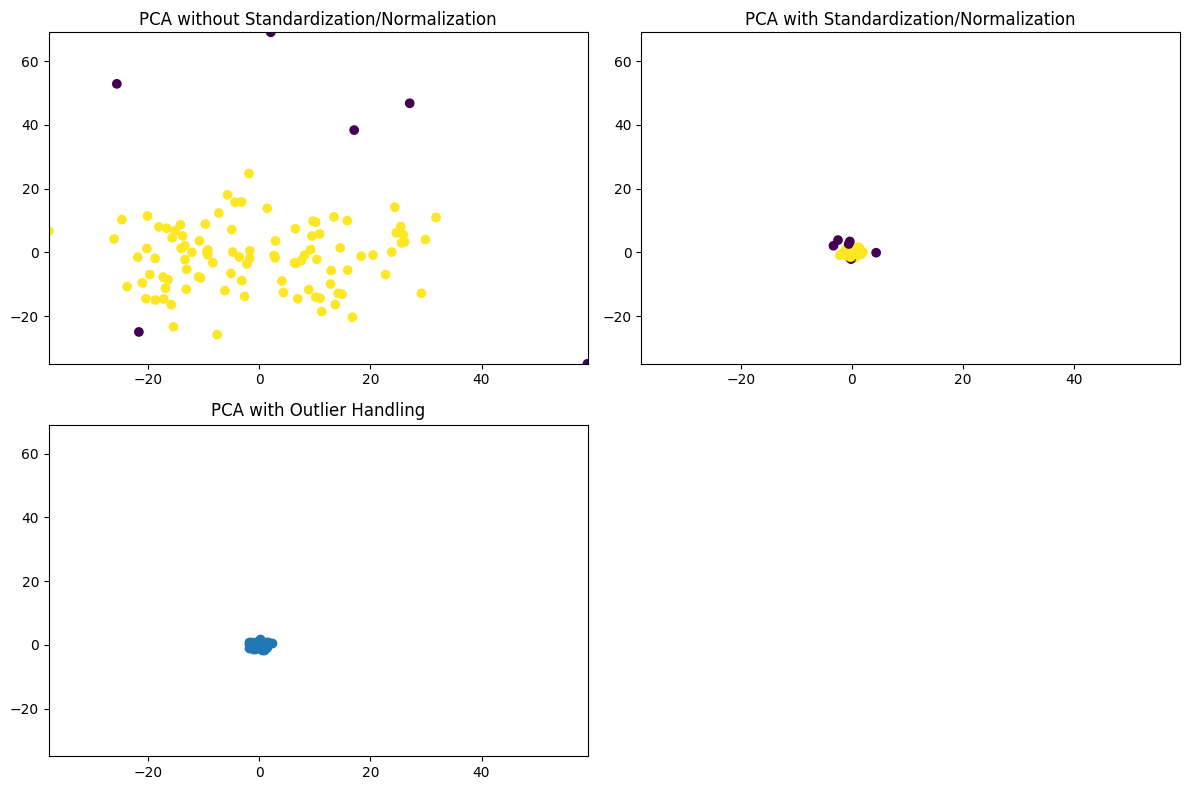

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter Plots de Componentes Principales en la misma escala
plt.figure(figsize=(12, 8))

# Determina los límites de los ejes para todos los gráficos
x_min, x_max = min(np.min(pca_raw_result[:, 0]), np.min(pca_scaled_result[:, 0]), np.min(pca_outliers_removed_result[:, 0])), \
               max(np.max(pca_raw_result[:, 0]), np.max(pca_scaled_result[:, 0]), np.max(pca_outliers_removed_result[:, 0]))
y_min, y_max = min(np.min(pca_raw_result[:, 1]), np.min(pca_scaled_result[:, 1]), np.min(pca_outliers_removed_result[:, 1])), \
               max(np.max(pca_raw_result[:, 1]), np.max(pca_scaled_result[:, 1]), np.max(pca_outliers_removed_result[:, 1]))

# PCA without Standardization/Normalization
plt.subplot(2, 2, 1)
plt.scatter(pca_raw_result[:, 0], pca_raw_result[:, 1], c=outlier_detector.predict(scaled_data))
plt.title('PCA without Standardization/Normalization')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# PCA with Standardization/Normalization
plt.subplot(2, 2, 2)
plt.scatter(pca_scaled_result[:, 0], pca_scaled_result[:, 1], c=outlier_detector.predict(scaled_data))
plt.title('PCA with Standardization/Normalization')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# PCA with Outlier Handling
plt.subplot(2, 2, 3)
plt.scatter(pca_outliers_removed_result[:, 0], pca_outliers_removed_result[:, 1])
plt.title('PCA with Outlier Handling')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


In this example:

Standardization/Normalization: We scaled the data to have zero mean and unit variance using StandardScaler. This helps ensure that features with different scales do not dominate the PCA.

Outlier Detection and Handling: We used the EllipticEnvelope method to detect and remove outliers from the scaled data.

Variance Explained: We calculated and compared the explained variance ratios of PCA for the raw data, scaled data, and scaled data with outliers removed. This helps us understand how much variance is captured by each approach.

Outlier Sensitivity: We measured the sensitivity to outliers by calculating the proportion of data points that were removed when outliers were detected and handled.

These metrics provide insights into how standardization/normalization and outlier detection/handling impact PCA's performance in terms of variance explained and sensitivity to outliers.

# Punto 9

UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique that relies on several mathematical principles:

1. **Topological Representation**: UMAP constructs a topological representation of the high-dimensional data by considering data points as nodes in a graph, where edges represent pairwise similarities between data points. The notion of a fuzzy simplicial set is used to create this topological structure.

2. **Local Connectivity**: UMAP focuses on preserving local neighborhood relationships. It uses a local fuzzy simplicial set to capture how data points are connected to their nearest neighbors, emphasizing data density and local structure.

3. **Global Structure**: UMAP also aims to preserve global structure by ensuring that data points that are farther apart in the high-dimensional space are still connected in the low-dimensional representation.

4. **Optimization**: UMAP optimizes a cost function that balances the preservation of local and global structures. The algorithm minimizes the discrepancy between pairwise similarities in the high-dimensional space and the low-dimensional space.

5. **Stochastic Gradient Descent (SGD)**: UMAP employs SGD to iteratively optimize the low-dimensional representation of data points, adjusting their positions in the embedding space.

These mathematical principles allow UMAP to create a meaningful low-dimensional representation of high-dimensional data while preserving both local and global structures. UMAP is particularly useful for visualization, clustering, and exploring complex datasets.

Usefulness:
UMAP is useful for visualizing high-dimensional data, exploring data patterns, and clustering. It is often employed in machine learning and data analysis tasks to uncover underlying structures in complex datasets.

# Punto 10

Latent Dirichlet Allocation (LDA) is a generative probabilistic model used for topic modeling in text data. Its underlying mathematical principles include:

Dirichlet Distributions: LDA employs the Dirichlet distribution to model the probability distributions of topics within documents and words within topics. It uses two Dirichlet distributions: one to model the distribution of topics in documents, and another to model the distribution of words in topics.

Multinomial Distribution: LDA assumes that each document is a mixture of topics, and each word in the document is generated from one of these topics. The distribution of words within a document is modeled using the multinomial distribution.

Bayesian Inference: LDA uses Bayesian inference to estimate the hidden parameters, such as the topic proportions in documents and the word distributions in topics. It applies techniques like Gibbs sampling or variational inference to approximate the posterior distributions.

Plate Notation: Plate notation is a graphical representation often used to describe the generative process of LDA. It visually depicts how documents, topics, and words are connected through probabilistic relationships.

These mathematical principles allow LDA to model the underlying structure of topics in a collection of documents, making it a valuable tool for discovering topics and themes in textual data.

Usefulness:
LDA is useful for identifying topics in a collection of documents. It is widely applied in text analysis, information retrieval, and recommendation systems to discover underlying themes and extract meaningful insights from text data.

# Punto 11

Learn ML Model Deployment in Python
There are several programming languages used for ML model deployment, but this section mainly focuses on deploying a machine-learning model in Python. We will walk you through each step of deploying a machine learning model in detail, from preprocessing the data and training the model to serializing it and deploying it as an API. Let's consider an example of deploying a sentiment analysis model using FastAPI in Python.



1. Data Preprocessing
The first step is handling missing values using techniques like mean imputation or more advanced methods like regression imputation. Then, you must perform feature scaling, such as standardization or normalization, to ensure all features are on a similar scale. You must encode categorical variables using methods like one-hot encoding or label encoding.

2. Model Optimization and Training
The second step involves selecting a suitable machine learning algorithm based on your problem, such as a Random Forest Classifier. You must split the data into training and testing sets using train_test_split from scikit-learn. Using techniques like grid or random search, you can quickly train the model using the training data and optimize it by tuning hyperparameters, such as the number of trees in a Random Forest.

3. Model Serialization
Once you are satisfied with the performance of your trained sentiment analysis model, it's crucial to serialize and save it for any future use. Serialization will convert the model into a binary format that can be stored on disk. The joblib library is commonly used for model serialization in Python. You can save the SVM Classifier model using the dump function, providing the model object and the file path where you want to save it, e.g., joblib.dump(model, 'model.pkl').

4. Prepare the Deployment Environment
The next step is installing the required libraries, such as FastAPI, to create a web API. To deploy your model, you need to set up the deployment environment. You must create a virtual environment to manage the dependencies and install the necessary packages using pip. This ensures that your deployment environment is isolated and has the required packages installed, avoiding conflicts with other Python projects.

5. Build The Deployment API
For building the deployment API for the Sentiment Analysis example, you must create a Python script to define the API endpoint. This script will handle incoming requests, preprocess the data, and make predictions using your trained SVM Classifier model. You will then load the serialized model into memory using joblib.load and preprocess incoming data to match the model's input requirements.

6. Test And Validate The Deployment
To ensure your deployment is functioning correctly, testing and validating it thoroughly is crucial. This step involves sending sample requests to the API using tools like requests or curl and verifying the output against expected results during model monitoring. You must further compare the predictions made by the deployment with those made during model development to ensure consistency and accuracy across multiple models.

7. Deploy The ML Model
You must choose a server or cloud platform to deploy your FastAPI application, such as Heroku, AWS, or Azure, as they provide the necessary infrastructure to host your deployment. You must also configure the server/cloud environment to handle incoming requests and route them to the API endpoint you defined in the previous step. When deploying your ML model in a production environment, you must always follow best practices for security, scalability, and availability.

8. Monitor And Maintain The Deployment
After deployment, monitoring and maintaining the model's performance continuously is crucial. You must implement logging and monitoring mechanisms to track API usage, performance metrics, and potential errors in existing or new models. You should regularly evaluate the model's performance and retrain it if necessary. Furthermore, you must update the deployment as needed, such as incorporating new model versions or enhancing the API to handle increasing traffic. Monitoring and maintaining the deployment through continuous delivery ensures that your model provides accurate and reliable predictions in real-world scenarios.

You can better understand how to deploy ML models in Python by working on the ‘AWS MLOps Project to Deploy Multiple Linear Regression Model’ project.

Now that you have understood how to deploy an ML model in Python using FastAPI, let us further explore this process using Flask, Django, and Streamlit.